In [2]:
import os, sys
lib_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(lib_path)

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/lho/Htw/bachelor/thesis-code/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from metric import MetricRecorder, MetricReader, plt
import matplotlib.patches as mpatches

In [4]:
mr = MetricReader(config_dir_path='../spearmint/minibatch-size/')

In [5]:
mr.get_metadata()

{u'_id': ObjectId('569fd2d5f2684a4ed519423a'),
 u'constants': {u'X_dirpath': u'../../../data/train/*',
  u'algorithm': u'RMSProp',
  u'batchsize': 5000000,
  u'epochs': 100,
  u'improvement_threshold': 0.995,
  u'limit': 20,
  u'lmbda': 0.0,
  u'patience': 20000,
  u'patience_increase': 2,
  u'training_size': 0,
  u'validation_frequency': 5,
  u'validation_size': 0,
  u'y_dirpath': u'../../../data/train_cleaned/'},
 u'experiment_name': u'minibatch-size'}

In [15]:
mr.get_records(job_id=9)

,_id,cost,epoch,iteration,job_id,second,validation_accuracy
0,56a11243f2684a5efb188dbd,0.000344,0,30000,9,53.789500,1.887758e-06
1,56a1126df2684a5efb188dbe,0.002505,0,60000,9,95.893903,1.502187e-07
2,56a11297f2684a5efb188dbf,0.000902,0,90000,9,138.012793,4.214081e-07
3,56a112c1f2684a5efb188dc0,0.000981,0,120000,9,179.846944,5.230439e-07


TypeError: Empty 'DataFrame': no numeric data to plot

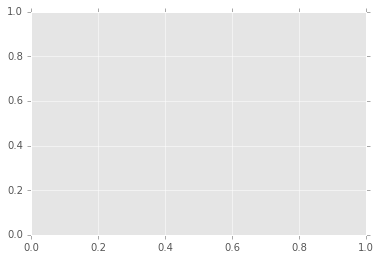

In [7]:
mr.plot_epoches(job_id=8, title='Lernphase Minibatch 1000')

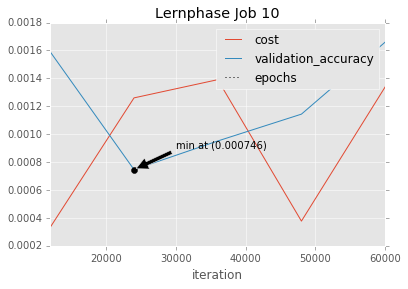

In [23]:
mr.plot(job_id=10)

0.0025000000000000001

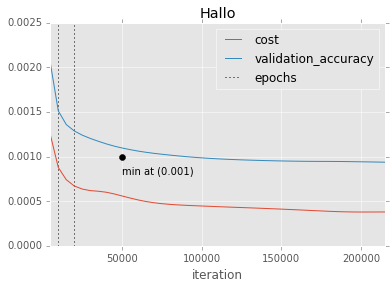

In [27]:
fig, ax = plt.subplots(1, 1)
ax.plot(xy=(50000, 0.001), marker='o', color="r", linestyle="None", label="test")
records[['cost', 'validation_accuracy', 'iteration']].plot(x='iteration', 
                                                           y=['cost', 'validation_accuracy'],
                                                           title="Hallo",
                                                           sharey=True, ax=ax)
ax.vlines(x=[10000,20000], ymin=[0],ymax=[0.0025], label='epochs', linestyle='dotted')
#ax.annotate('min', xy=(50000, 0.001), xytext=(50000+30000, 0.0016), arrowprops=dict(facecolor='black', shrink=0.003))
ax.annotate('min at (0.001)', xy=(50000, 0.001), xytext=(50000, 0.0008), arrowprops=None)
ax.plot(50000, 0.001, 'o', color="k")
ax.legend()
ax.get_ylim()[1]


In [98]:
records['iteration'].values

array([  4999,   9999,  14999,  19999,  24999,  29999,  34999,  39999,
        44999,  49999,  54999,  59999,  64999,  69999,  74999,  79999,
        84999,  89999,  94999,  99999, 104999, 109999, 114999, 119999,
       124999, 129999, 134999, 139999, 144999, 149999, 154999, 159999,
       164999, 169999, 174999, 179999, 184999, 189999, 194999, 199999,
       204999, 209999, 214999])

[]

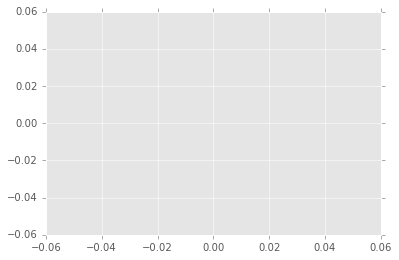

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x=records['iteration'].values, y=records['cost'].values)

In [ ]:
ax = fig.add_subplot

In [36]:
metric.metrics.name

u'db.meta'

In [178]:
metric.metrics.distinct('job_id')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [173]:
cur.next()

StopIteration: 

In [91]:
cur2.next()

{u'_id': ObjectId('569e75eff2684a2a9369a51b'),
 u'constants': {u'X_dirpath': u'../../../data/train/*',
  u'batchsize': 5000000,
  u'epochs': 100,
  u'improvement_threshold': 0.995,
  u'limit': 30,
  u'lmbda': 0.0,
  u'mini_batch_size': 500,
  u'patience': 20000,
  u'patience_increase': 2,
  u'validation_frequency': 5000,
  u'y_dirpath': u'../../../data/train_cleaned/'},
 u'experiment_name': u'metric-test'}